In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/2018-chicago-employees-salaries/chicago_employees.csv


In [2]:
df=pd.read_csv('/kaggle/input/2018-chicago-employees-salaries/chicago_employees.csv')

We begin by explorung the data and see something interesting

In [3]:
df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,$101442.00,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,$94122.00,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,$101592.00,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,$110064.00,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,$19.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
Name                 33183 non-null object
Job Titles           33183 non-null object
Department           33183 non-null object
Full or Part-Time    33183 non-null object
Salary or Hourly     33183 non-null object
Typical Hours        8022 non-null float64
Annual Salary        25161 non-null object
Hourly Rate          8022 non-null object
dtypes: float64(1), object(7)
memory usage: 2.0+ MB


In [5]:
df.count()

Name                 33183
Job Titles           33183
Department           33183
Full or Part-Time    33183
Salary or Hourly     33183
Typical Hours         8022
Annual Salary        25161
Hourly Rate           8022
dtype: int64

We see that the column "Hourly Rate" has too many null values, and it's obvious that this variable is correlated with a linear function to annual salary, which is the part that we want to see details and relations about it. so we gonna remove this column anyway.

In [6]:
df.drop('Hourly Rate',axis=1, inplace=True)

Now let's see the some descriptive statistics about annual salary

In [7]:
import matplotlib.pyplot as plt

So we need to convert this attribute to integers.

Feature engineering

We first replace the $ sign from the each row that has the number and ve omit the .00 value of the cents( With respect to the median that we will see in the following, cents are neglectable in this model)

In [9]:
for i in range(df["Annual Salary"].size):
    if(type(df["Annual Salary"][i])==str):
            df["Annual Salary"][i]=df["Annual Salary"][i].replace("$","")
            df["Annual Salary"][i]=df["Annual Salary"][i].replace(".00","")




/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
df["Annual Salary"]

0        101442
1         94122
2        101592
3        110064
4           NaN
          ...  
33178     72510
33179     48078
33180     90024
33181     93354
33182    115932
Name: Annual Salary, Length: 33183, dtype: object

In [11]:
for i in range(df["Annual Salary"].size):
    if(type(df["Annual Salary"][i])==str):
        if(not df["Annual Salary"][i]==False):
            df["Annual Salary"][i]=float(df["Annual Salary"][i])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


We see that some values have other cents amount.

<bound method Axes.hist of <matplotlib.axes._subplots.AxesSubplot object at 0x7f513fd628d0>>

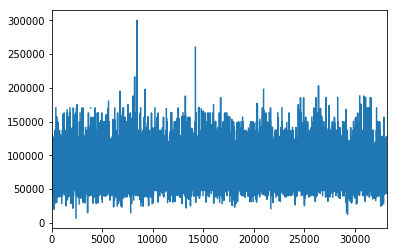

In [12]:
df["Annual Salary"].plot().hist

Now we replace the missing values for Annual Salary column with the median of the sample, and then we're gonna replace it with mean sample and see the differences.

In [13]:
median=df["Annual Salary"].median()
value1={"Annual Salary": median}
df.fillna(value=value1)


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,90024.0
...,...,...,...,...,...,...,...
33178,"ZYLINSKA, KATARZYNA",POLICE OFFICER,POLICE,F,Salary,NaN,72510.0
33179,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,48078.0
33180,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0
33181,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0


Now we are done with this column and and we need to check the typical hour column

In [14]:
df["Typical Hours"].value_counts()

40.0    5833
20.0    1901
10.0     184
35.0     104
Name: Typical Hours, dtype: int64

As we see, only near 8000 rows have non-null values and the 25% of the population has 20 hours for this column, we will need to do something about this problem, but first let make another data frame without this column and do some analysis

In [15]:
df1= df.drop("Typical Hours", axis=1, inplace=False)

In [16]:
df["Full or Part-Time"].value_counts()

F    31090
P     2093
Name: Full or Part-Time, dtype: int64

So by this we can manage the Typical Hours Salary, since if someone is emplpyed as a full time position, they will have to work 40 hours per week.

Lets see what we can find from job titles column

In [17]:
df["Job Titles"].describe()

count              33183
unique              1111
top       POLICE OFFICER
freq                9520
Name: Job Titles, dtype: object

we see that we have 1111 unique values into the 33183 samples and Police Officer is the most job used with 9520 times used. So with having this in mind, spilit the dataset by jobs may sound interesting, lets see what we can get about pollice officers.

In [18]:
police=df[df["Job Titles"]=="POLICE OFFICER"]

In [19]:
police

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary
9,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,93354
11,"ABDALLAH, ZAID",POLICE OFFICER,POLICE,F,Salary,NaN,84054
12,"ABDELHADI, ABDALMAHD",POLICE OFFICER,POLICE,F,Salary,NaN,87006
14,"ABDELMAJEID, AZIZ",POLICE OFFICER,POLICE,F,Salary,NaN,84054
22,"ABEJERO, JASON V",POLICE OFFICER,POLICE,F,Salary,NaN,90024
...,...,...,...,...,...,...,...
33177,"ZYGMUNT, DAWID",POLICE OFFICER,POLICE,F,Salary,NaN,72510
33178,"ZYLINSKA, KATARZYNA",POLICE OFFICER,POLICE,F,Salary,NaN,72510
33179,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,48078
33180,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024


Lets see the distributions

In [20]:
police["Annual Salary"].describe()

count      9520.0
unique       15.0
top       90024.0
freq       2065.0
Name: Annual Salary, dtype: float64

In [21]:
police["Annual Salary"].mean()

82149.49600840337

In [22]:
police["Annual Salary"].std()

14204.522343967055

Now lets fit a kernel density function to the distribution of policemen salaries:

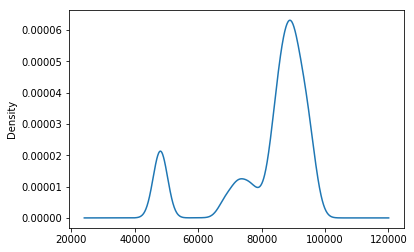

In [23]:
police["Annual Salary"].plot.kde()

from this plot the first guess is that the group of policemen can be devided in two general part like part A and part B which part A represents the left peak and part B represent the right peak.
The very first other guess is that the part A is the entry level ones with less experience while the group B is the ones with higher experience

now lets see what other titles can say more

In [24]:
#df=df[df["Job Titles"]!="POLICE OFFICER"]

In [25]:
df

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN
...,...,...,...,...,...,...,...
33178,"ZYLINSKA, KATARZYNA",POLICE OFFICER,POLICE,F,Salary,NaN,72510
33179,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,48078
33180,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024
33181,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,93354


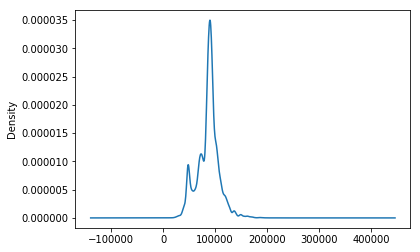

In [26]:
df["Annual Salary"].plot.kde()

Now it's more reasonable since data now has more normal distribution, now lets see the outliers

In [27]:
out1=df[df["Annual Salary"]>180000]
out2=df[df["Annual Salary"]<30000]

In [28]:
out1

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary
6739,"DEAL, AARON J",CHIEF OF STAFF,MAYOR'S OFFICE,F,Salary,NaN,195000
8036,"EDGEWORTH, RICHARD A",DEPUTY FIRE COMMISSIONER,FIRE,F,Salary,NaN,187680
8195,"EMANUEL, RAHM",MAYOR,MAYOR'S OFFICE,F,Salary,NaN,216210
8436,"EVANS, GINGER S",COMMISSIONER OF AVIATION,AVIATION,F,Salary,NaN,300000
9224,"FORD II, RICHARD C",FIRST DEPUTY FIRE COMMISSIONER,FIRE,F,Salary,NaN,197736
13223,"HROMA, DONALD",DEPUTY FIRE COMMISSIONER,FIRE,F,Salary,NaN,187680
14216,"JOHNSON, EDDIE T",SUPERINTENDENT OF POLICE,POLICE,F,Salary,NaN,260004
16717,"LEWIN, JONATHAN H",CHIEF,POLICE,F,Salary,NaN,185364
20973,"NAVARRO, KEVIN B",FIRST DEPUTY SUPERINTENDENT,POLICE,F,Salary,NaN,197724
24631,"RICCIO, ANTHONY J",CHIEF,POLICE,F,Salary,NaN,185364


In [29]:
out2

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary
178,"ADELMAN, BRUCE E",LEGISLATIVE AIDE,CITY COUNCIL,F,Salary,NaN,19968
373,"ALEGRIA, CRISTINA G",CLERK - BD OF ELECTIONS,BOARD OF ELECTION,F,Salary,NaN,29328
970,"ARENAS, ANA LUISA",LIBRARY CLERK,PUBLIC LIBRARY,F,Salary,NaN,29064
1374,"BAKER JR, RALPH",CLERK - BD OF ELECTIONS,BOARD OF ELECTION,F,Salary,NaN,29328
1395,"BALASKOVITS, KATHRYN",CLERK CITY COUNCIL,CITY COUNCIL,F,Salary,NaN,25008
1741,"BATTLE, ANTHONY C",ELECTION EQUIPMENT & SUPPLY SPEC I,BOARD OF ELECTION,F,Salary,NaN,27912
1884,"BEHLING, DAVID M",CLERK - BD OF ELECTIONS,BOARD OF ELECTION,F,Salary,NaN,28608
2074,"BERONSKI, BARBARA",LEGISLATIVE AIDE,CITY COUNCIL,F,Salary,NaN,21672
2383,"BLONSKI, KATHERINE E",ALDERMANIC AIDE,CITY COUNCIL,P,Salary,NaN,7200
2693,"BOYD-GREATHOUSE, KAREN D",CLERK - BD OF ELECTIONS,BOARD OF ELECTION,F,Salary,NaN,27912


This two list can say what are the best jobs and worst jobs in chicago according to this dataset.

In [30]:
x=df[df["Department"]=="POLICE"]

In [31]:
x

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122
9,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,93354
11,"ABDALLAH, ZAID",POLICE OFFICER,POLICE,F,Salary,NaN,84054
12,"ABDELHADI, ABDALMAHD",POLICE OFFICER,POLICE,F,Salary,NaN,87006
...,...,...,...,...,...,...,...
33177,"ZYGMUNT, DAWID",POLICE OFFICER,POLICE,F,Salary,NaN,72510
33178,"ZYLINSKA, KATARZYNA",POLICE OFFICER,POLICE,F,Salary,NaN,72510
33179,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,48078
33180,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024


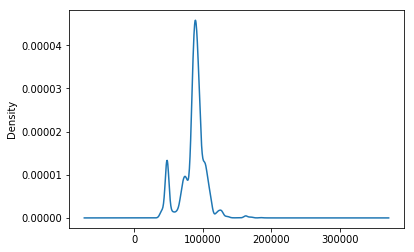

In [32]:
x["Annual Salary"].plot.kde()

The distribution of salaries in the police department